# DSCI 100 Group 36 Project Report

Soll Chi, Youchan Goh, Michael Qiu, Pawan Sekhon

# Predicting whether or not a patient will have chest pain based on resting blood pressure and maximum heart rate

## Introduction

Heart disease, or cardiovascular disease, refers to conditions that affect the heart and blood vessels. Heart disease is usually linked to chest pain, and the relationship between the two can be separated into four categories:
- Typical angina is a temporary chest pain when the heart  does not receive enough oxygenated blood (Department of Health & Human Services, 2001). Typical angina can be a symptom of coronary heart disease and is more common in men.
- Atypical angina is more subtle with its symptoms and can cause fatigue or shortness of breath. It can also cause discomfort in the throat, back, stomach and other areas; the feeling is described as muscle pain and is more common in women (Olsson, 2021).
- Non-anginal pain may be experienced by a person without heart disease might feel behind their breast bone. This pain is caused by different reasons than typical angina, such as issues with the esophagus or lungs (Cleveland Clinic, 2022).
- Asymptomatic heart disease is said to feel like heartburn and may not cause chest pain, but can have the same effects as a normal heart attack and causes blockage of blood flow and damage to heart muscles (Mankad, 2022). 

Chest pains associated with angina occur when the heart does not receive enough oxygen rich blood. Thus, hearts will show a higher heart rate (Cleveland Clinic, 2022). Additionally, lower diastolic blood pressure (blood pressure when the heart is resting between beats) is shown to be related to patients experiencing angina (Peri-Okonny et al., 2018). Ultimately, a higher heart rate means that the heart is pumping faster to keep up with oxygen demands, usually due to low blood pressure. Since angina is a common indicator of heart disease (Cleveland Clinic, 2022), we wanted to use the two indicators mentioned above to predict whether or not a patient will have chest pain. By extension, this may be able to warn individuals about the potential onset of heart disease. 

The question that we want to answer is: **"Can the presence of chest pain in a patient be predicted by resting blood pressure and maximum heart rate?"**

We chose a data frame from the Heart Disease database, accessible through the UC Irvine Machine Learning Repository (Janosi et al., 1988). We will be using `processed.cleveland.data` which shows records of patients in Cleveland detailing the following medical information:
- age: age
- sex: sex (1 = male; 0 = female)
- **cp**: chest pain type
- **trestbps**: resting blood pressure (mmHg)
- chol: serum cholestoral (mg/dl)
- fbs: fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
- restecg: resting electrocardiographic results
- **thalach**: maximum heart rate achieved
- exang: whether exercise induced angina (1 = True, 0 = False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- ca: number of major vessels (0-3) coloured by flourosopy
- thal: 3 = normal, 6 = fixed defect, 7 = reversable defect
- num: diagnosis of heart disease
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

The original data splits chest pain into four different types, but for the sake of analysis and a more balanced data set, we have simplified it to whether or not an individual experienced chest pain of any sort. In our analysis, we will be using two predictors to predict whether a patient will experience chest pain or not. The first predictor is thalach, the  maximum heart rate achieved by an individual. The second predictor is trestbps, a patient's resting blood pressure. We chose these predictors based on the research done above, and will be using a K-NN classification model to classify whether a person will experience chest pain or not.

## Methods

The steps we plan to take to answer our predictive question are outlined below.

#### Preliminary Exploratory Data Analysis

1. Loading in appropriate libraries to perform K-NN classification

2. Importing `processed.cleveland.data` from database and adding column names to data frame

3. Cleaning and tidying data frame and adding new `chestpain` diagnosis column for data analysis purposes

4. Splitting data into training and testing sets

5. Summarizing and visualizing training set to determine relationship between predictor variables and chest pain diagnosis

#### K-NN Classification Model Design and Finding  Optimal K value

1. Creating a workflow to tune for optimal value of K and visualizing accuracy results
2. Comparing mean accuracies of each K value to verify results of model optimization

#### Classification Model Testing

1. Re-fitting classification model to training data using new optimal K value
2. Using model to predict `chestpain` diagnosis on testing set

#### Analysis of Classifier

1. Evaluating accuracy and confusion matrix of model to analyze its effectiveness
2. Comparison to majority classifier
3. Plotting results of testing data to check for over/underfitting

## Preliminary Exploratory Data Analysis

#### Loading in Appropriate Libraries

We imported the tidyverse, tidymodels, dplyr, repr, and readr packages to be used in our data analysis.

In [1]:
# Loading in libraries
library(tidyverse)
library(tidymodels)
library(dplyr)
library(repr)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### Importing `processed.cleveland.data`

We used the `read_csv` function to load the data frame from the web. We also edited the column names to those indicated by the database, and visualized parts of the data frame to ensure that it loaded in correctly.

In [36]:
# Reading data from web
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cleveland <- read_csv(url)

# Applying column titles
names(cleveland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                        "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

head(cleveland)
tail(cleveland)
nrow(cleveland)

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


[1] 302

**Figure 1.** Raw data from the Cleveland database containing 302 rows of data. The head and tail of the data frame are shown with the columns labelled correctly.

#### Cleaning and Tidying Data Frame

We created a new data frame containing the variables needed for analysis and removed most other variables that were not going to be used. The remaining columns were edited for use in our analysis. We also created a new column, `chestpain`, to determine whether chest pain was present in a patient or not depending on the diagnosis from the `cp` column.

In [52]:
# Filtering for observations with unknown values
cleveland_new <- subset(cleveland, trestbps != "?")
cleveland_new <- subset(cleveland_new, thalach != "?")

# Editing columns for analysis
cleveland_new <- select(cleveland_new, age, sex, cp, trestbps, thalach) |>
    mutate(sex = ifelse(sex == 0, "male", "female")) |>
    mutate(cp = recode(cp,
        `1` = "typical angina",
        `2` = "atypical angina",
        `3` = "non-anginal pain",
        `4` = "asymptomatic")) |>
    mutate(sex = as_factor(sex)) |>
    mutate(trestbps = as.numeric(trestbps)) |>
    mutate(cp = as_factor(cp))

# Adding new chestpain column
cleveland_new <- mutate(cleveland_new, chestpain = as.factor(ifelse(is.na(cp), NA, (cp != "asymptomatic"))))

head(cleveland_new)
nrow(cleveland_new)

age,sex,cp,trestbps,thalach,chestpain
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>
67,female,asymptomatic,160,108,FALSE
67,female,asymptomatic,120,129,FALSE
37,female,non-anginal pain,130,187,TRUE
41,male,atypical angina,130,172,TRUE
56,female,atypical angina,120,178,TRUE
62,male,asymptomatic,140,160,FALSE


[1] 302

**Figure 2.** Wrangled and cleaned data containing variables of interest. New `chestpain` column has been created based on `cp` and simplified to either no pain (FALSE) or pain (TRUE).

#### Splitting Data

We split our new data frame into a training and testing set using `initial_split` with the proportions set to 75% training and 25% testing. The training set was used to create the classification model and the testing set was used to evaluate the performance of the model. The testing set was not exposed to the model during training to avoid any unwanted bias due to the classifier being able to see the data in advance. The data was stratified by `chestpain`, the variable we want to predict using our classifier, and we compared the number of rows in each data frame to ensure that the ratio was correct.

In [53]:
# Setting seed to create reproducible data
set.seed(42)

# Splitting data frame into training and testing sets
cleveland_split <- initial_split(cleveland_new, prop = 0.75, strata = chestpain)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

nrow(cleveland_train)
nrow(cleveland_test)

# Checking proportions of training and testing sets
cleveland_ratio <- nrow(cleveland_train)/(nrow(cleveland_train) + nrow(cleveland_test))
cleveland_ratio

[1] 226

[1] 76

[1] 0.7483444

#### Summarizing and Visualizing Training Set

We compared the `trestbps` and `thalach` values of patients with and without chest pain for the training data to identify that there was a relationship that we could work with to build the classification model. We used `group_by` and `summarize` to create a new table outlining the mean values of our predictors.

In [38]:
# Calculating mean trestbps and thalach values for training set observations
chestpain_summary <- cleveland_train |>
    group_by(chestpain) |>
    summarize(count = n(), mean_trestbps = mean(trestbps), mean_thalach = mean(thalach))

chestpain_summary

chestpain,count,mean_trestbps,mean_thalach
<fct>,<int>,<dbl>,<dbl>
FALSE,108,132.2593,141.4907
TRUE,118,130.9153,156.8898


**Figure 3.** Summary of predictor values for training data. We can conclude that the proportion of patients with chest pain was slightly higher than those without, and they had a lower resting blood pressure and higher maximum heart rate on average.

We also created a scatter plot of our predictor variables and the class we want to predict using `ggplot`. We plotted `thalach` on the x-axis and `trestbps` on the y-axis, separating the values by colour based on the diagnosis of `chestpain`.

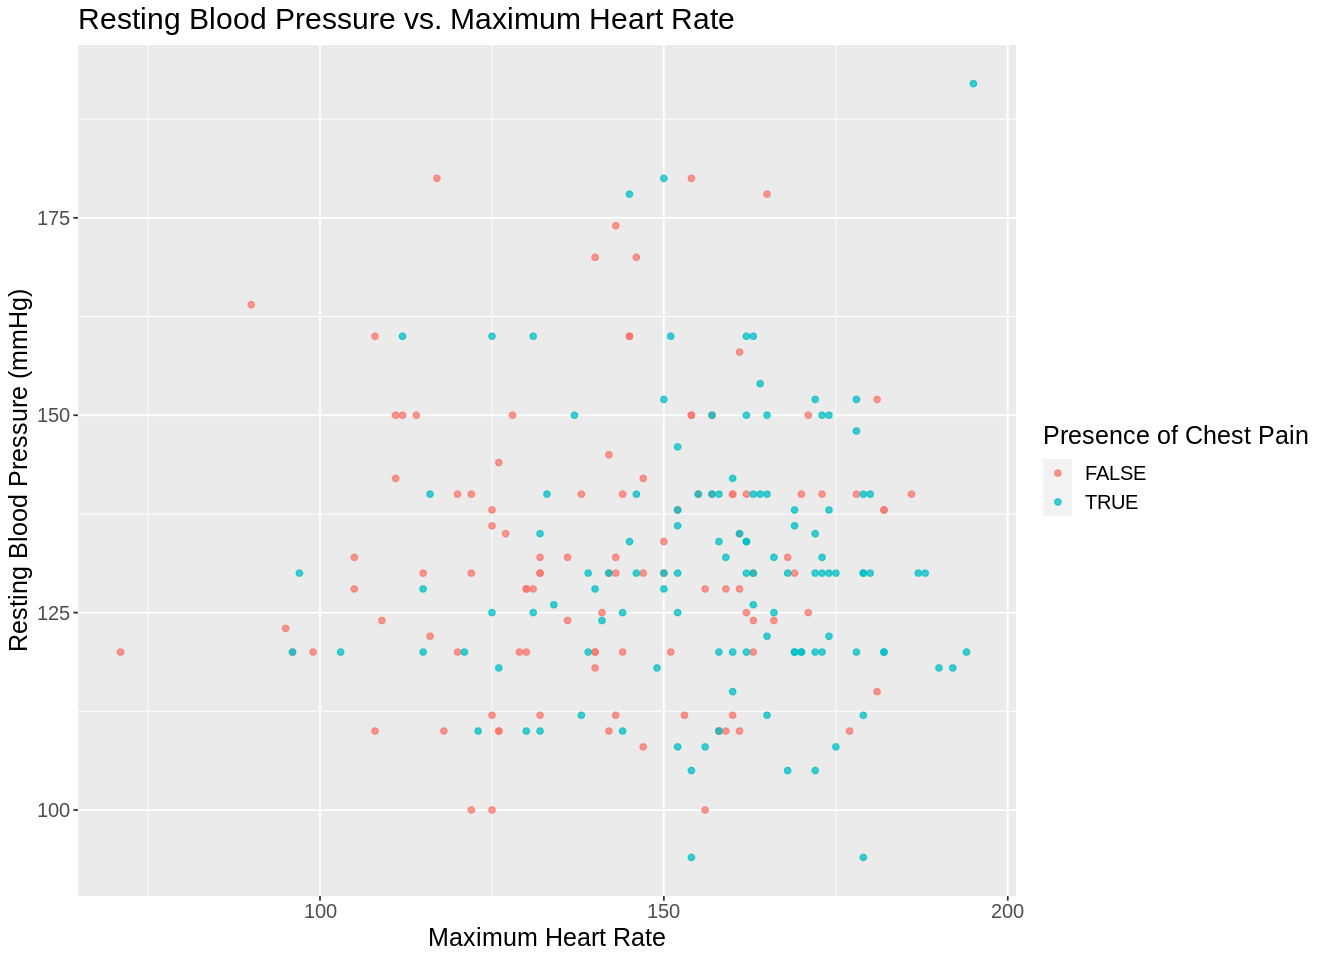

In [74]:
# Setting plot size
options(repr.plot.width=11, repr.plot.height=8)

# Generating plot of training data
chestpain_plot <- cleveland_train |>
    ggplot(aes(x = thalach, y = trestbps, color = chestpain)) +
    geom_point(alpha = 0.75) +
    xlab("Maximum Heart Rate") +
    ylab("Resting Blood Pressure (mmHg)") +
    ggtitle("Resting Blood Pressure vs. Maximum Heart Rate") +
    labs(color = "Presence of Chest Pain") +
    theme(text = element_text(size = 15))

chestpain_plot

**Figure 4.** Visualization of the relationship between maximum heart rate and resting blood pressure based on chest pain type. By comparing the different coloured points, we can see that patients with chest pain (blue) tend to have a higher maximum heart rate and slightly lower resting blood pressure. This analysis, combined with the summary table above, allows us to make a prediction about how the classifier will evaluate variables; patients that the model predicts as having chest pain will likely have a higher maximum heart rate and lower resting blood pressure when compared to patients without chest pain.

## K-NN Classification Model Design and Finding  Optimal K value

#### Creating a Workflow

In order to train our K-NN classification model and determine the optimal K value, we created a workflow that combined the following factors:
- A recipe that used `cleveland_train` data using `thalach` and `trestbps` as predictors to predict `chestpain`, with all predictor variables scaled and standardized
- A model specification with the number of neighbors set to `tune()` in order to evaluate the optimal K value
- A 5-fold cross-validation using `cleveland_train` stratified by `chestpain`, with `v = 5` to create 5 different validation sets
- A tibble that set the tested K values from 1 to 50

We then collected the metrics of the workflow and plotted the accuracy value on a graph against the number of neighbors (value of K). A seed was also set prior to this to ensure that the results would be reproducible when performed multiple times.

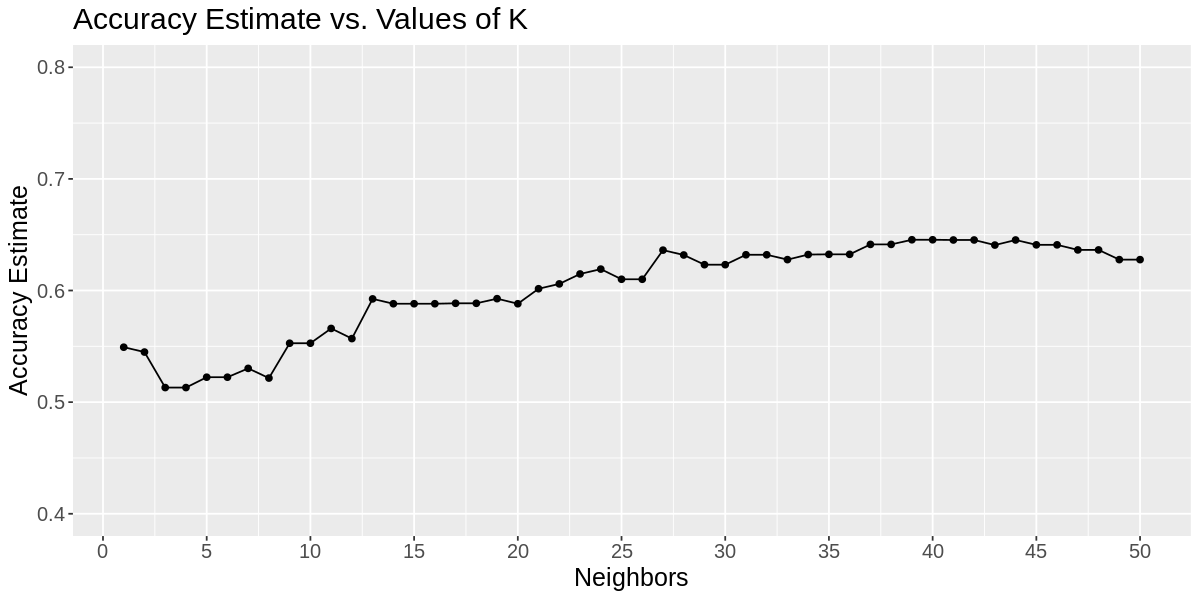

In [59]:
set.seed(42)

# Creating recipe and standardizing all predictors
heart_recipe <- recipe(chestpain ~ thalach + trestbps, data = cleveland_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Creating K-NN classification model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Performing 5-fold cross-validation
heart_vfold <- vfold_cv(cleveland_train, v = 5, strata = chestpain)

# Specifying K values to be tested
gridvals <- tibble(neighbors = c(1:50))

# Creating workflow
heart_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics()

# Pulling accuracy estimates from workflow
accuracies <- heart_fit |> 
    filter(.metric == "accuracy")

options(repr.plot.width=10, repr.plot.height=5)

# Plotting accuracy against K value
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Accuracy Estimate vs. Values of K") +
    scale_x_continuous(breaks = seq(0, 50, by = 5)) +  
    scale_y_continuous(limits = c(0.4, 0.8)) +
    theme(text = element_text(size = 15))

accuracy_versus_k

**Figure 5.** Estimated accuracy of different k values for a K-NN classification model. From this graph, it seems that K = 39 to 42 have the highest estimated accuracy.

#### Comparing Mean Accuracies

To validate our findings from Figure 5, we created a table based on the results of our workflow that highlighted the highest estimated accuracy values.

In [60]:
# Finding K values with highest accuracy
accuracies_table <- accuracies |>
    arrange(desc(mean))

head(accuracies_table)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
39,accuracy,binary,0.6454545,5,0.04237552,Preprocessor1_Model39
40,accuracy,binary,0.6454545,5,0.04237552,Preprocessor1_Model40
41,accuracy,binary,0.6452569,5,0.04123289,Preprocessor1_Model41
42,accuracy,binary,0.6452569,5,0.04123289,Preprocessor1_Model42
44,accuracy,binary,0.6452569,5,0.04123289,Preprocessor1_Model44
37,accuracy,binary,0.6413043,5,0.04928443,Preprocessor1_Model37


**Figure 6.** Highest estimated accuracy K values for K-NN classification model. The results of this table indicate that K = 39 and K = 40 are the best values to use in our classification model. As seen in Figure 5, changing these values to nearby one does not significantly decrease accuracy, indicating that either choice will be reliable when accounting for uncertainty. Ultimately, the smaller value of 39 was chosen to lower the cost of training the model.

## Classification Model Testing

#### Re-fitting Classification Model

We used our obtained optimal K value of 39 to retrain the classification model. We created a new specification set to `neighbors = 39` and combined it with the previous `heart_recipe` in a workflow.

In [61]:
# Creating new model specification with K = 39
best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 39) |>
    set_engine("kknn") |>
    set_mode("classification")

# Creating new workflow
best_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(best_spec) |>
    fit(data = cleveland_train)

best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(39,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3672566
Best kernel: rectangular
Best k: 39

#### Using Model to Predict `chestpain` Diagnosis

We used the newly trained model to perform predictions on the `cleveland_test` data using the `predict` function. This created a new column of predictions named `.pred_class` in our testing data that we could compare to the true results in `chestpain`.

In [62]:
# Predicting testing data using best_fit workflow
predictions <- predict(best_fit, cleveland_test) |>
    bind_cols(cleveland_test)

head(predictions)

.pred_class,age,sex,cp,trestbps,thalach,chestpain
<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>
FALSE,57,female,asymptomatic,140,148,FALSE
TRUE,56,male,atypical angina,140,153,TRUE
TRUE,52,female,non-anginal pain,172,162,TRUE
TRUE,48,female,atypical angina,110,168,TRUE
TRUE,49,female,atypical angina,130,171,TRUE
FALSE,66,male,typical angina,150,114,TRUE


**Figure 7.** Prediction results of K-NN classification model using K = 39. The predictions are in a new column labelled `.pred_class` and the actual diagnoses can be seen in `chestpain`.

## Analysis of Classifier

#### Evaluating Accuracy and Confusion Matrix

 The metrics of the analysis were pulled to evaluate the accuracy of the model's predictions. We also created a confusion matrix using `conf_mat` to determine the number of correct and incorrect predictions and to determine which classification the model was better at predicting.

In [49]:
# Evaluating accuracy of predictions
metrics <- predictions |>
    metrics(truth = chestpain, estimate = .pred_class)

metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7500000
kap,binary,0.4965132


**Figure 8.** Accuracy of final K-NN classification model on test data. The model had an accuracy of 0.75, meaning that it made a correct prediction 75% of the time.

In [63]:
# Generating confusion matrix to evaluate predictions made
conf_mat <- predictions |> 
    conf_mat(truth = chestpain, estimate = .pred_class)

conf_mat

          Truth
Prediction FALSE TRUE
     FALSE    25    8
     TRUE     11   32

**Figure 9.** Confusion matrix for predicted chest pain type using the test data. Of the 76 predictions, 57 were correct with 25 FALSE and 32 TRUE. There were 11 false positives, in which the predictor classified the patient as TRUE but the actual result was FALSE, and 8 false negatives, in which the predictor classified the patient as FALSE but that actual result was TRUE.

#### Comparison to Majority Classifier

In order to compare the accuracy of our model to a majority classifier (which always guesses the majority label), we analyzed the training data to determine the proportions of TRUE and FALSE diagnoses for chest pain.

In [77]:
chestpain_proportions <- cleveland_train |>
    group_by(chestpain) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(cleveland_train))

chestpain_proportions

chestpain,n,percent
<fct>,<int>,<dbl>
FALSE,108,47.78761
TRUE,118,52.21239


**Figure 10.** Proportions of chest pain presence in training data. There were more patients with chest pain (52.2%), which means that as the majority, the majority classifier would have predicted TRUE every time and been correct 52.2% of the time. Since our classification model yielded an accuracy of 75%, it is more accurate than a majority classifier.

#### Plotting Results of Testing Data

We wanted to evaluate the results of the model's predictions to ensure that it was not overfitting or underfitting the data. In a case of overfitting, the K value would be too low, decreasing the number of neighbors used to make the prediction. This would give each point a stronger vote, creating a noisy and inconsistent model. On the other hand, underfitting would be caused by the K value being too high. By increasing the number of neighbors, even observations far away from the point would get a vote in making the prediction, creating a smoothed out and simplified model.

We want to avoid this by plotting the results of `cleveland_test` and adding a coloured background to visualize the model's method of predicting the new points.

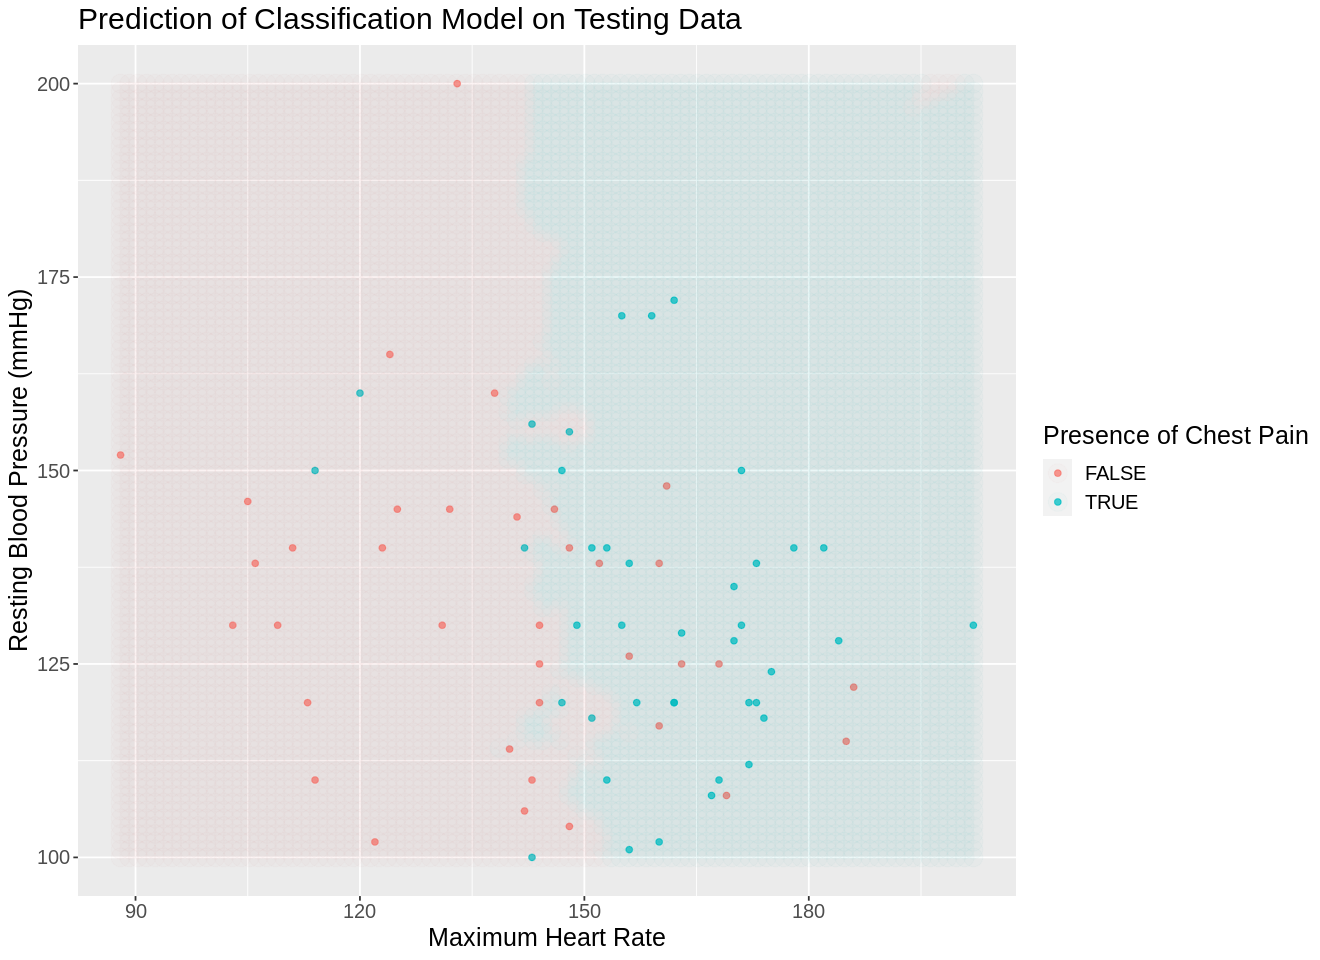

In [75]:
# Checking for over/underfitting
thal_grid <- seq(min(cleveland_test$thalach), max(cleveland_test$thalach), length.out = 100)

trest_grid <- seq(min(cleveland_test$trestbps), max(cleveland_test$trestbps), length.out = 100)

asgrid <- as_tibble(expand.grid(thalach = thal_grid, trestbps = trest_grid))

knnPredGrid <- predict(best_fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) |> 
    rename(chestpain = .pred_class)

options(repr.plot.width=11, repr.plot.height=8)

wkflw_plot <- ggplot() +
    geom_point(data = cleveland_test, mapping = aes(x = thalach, y = trestbps, color = chestpain), alpha = 0.75) +
    geom_point(data = prediction_table, mapping = aes(x = thalach, y = trestbps, color = chestpain), alpha = 0.02, size = 5) +
    labs(color = "Presence of Chest Pain", x = "Maximum Heart Rate", y = "Resting Blood Pressure (mmHg)") +
    ggtitle("Prediction of Classification Model on Testing Data") +
    theme(text = element_text(size = 15))

wkflw_plot

**Figure 11.** Testing data predictions and results of classification model. The background of the graph indicates that the K value of 39 is adequate for this model, and does not cause overfitting or underfitting of the data.

## Discussion

#### Summary and Expectations

The predictive question that we wanted to answer through this data analysis was: "Can the presence of chest pain in a patient be predicted by resting blood pressure and maximum heart rate?". In order to accomplish this, we designed a K-NN classification model to predict whether chest pain would be present or not in a patient using resting blood pressure and maximum heart rate as predictors.

After cleaning, wrangling, and separating our data into a training and testing set, we used the training data to design our classification model. We determined the optimal value of K through 5-fold cross-validation, and evaluated our final model using the testing data. Because chest pain is often linked with heart disease and heart failure, being able to predict the potential onset of chest pain in a patient

After analyzing the training data, we discovered a correlation between the presence of chest pain and our predictors (resting blood pressure and maximum heart rate). We found that patients experiencing chest pain had a lower resting blood pressure and higher maximum heart rate on average. As seen in Figure 4, we were able to observe a relationship and a significant enough difference in the two predictor variables to proceed with the analysis and have confidence in the accuracy of our model.

#### Results of Data Analysis

Testing our final classification model resulted in an accuracy of 75%; of the 76 predictions, 52 were made correctly. Out of the incorrect predictions, more incorrect false positive predictions were made than false negatives. Although ideally the predictor would not make any errors, falsely predicting that the patient will experience chest pain is much better than having the patient unexpectedly experience it after the model did not predict so.

Some ways that our classification model could be improved would be using a larger data set and possibly from different sources (so that the model is not limited to the data from Cleveland), using different predictor variables that show a more significant correlation with the variable we want to predict, and using different methods of analysis to see if there is a model that better fits the data.

Based on the prediction method of the model seen in Figure 11, we found that the patients predicted to have chest pain (blue) were often associated with higher maximum heart rates; contrary to our prediction, however, the relationship was not as obvious for resting blood pressure. Because there is evidence that both high and low blood pressure results in chest pain and heart problems, the relationship that we observed in the training data was not sufficient to confidently predict the presence of chest pain. Again, this could have been improved by increasing the size of the data used in the analysis or by choosing predictor variables that have a stronger correlation with the presence of chest pain. 

#### Impacts of Findings

These findings can be used to help doctors identify possible early signs of heart disease. Because chest pain is often linked to heart disease, being able to predict if a patient will experience chest pain based on other variables (such as our chosen resting blood pressure and maximum heart rate) would be extremely useful in helping doctors make a more accurate diagnosis and potentially being able to treat patients earlier to prevent major symptoms and possibly death. Automating the diagnosis process through a classification model would also increase efficiency in the hospital, allowing medical personnel to treat more patients in the same amount of time.

However, the classification model should be improved significantly before being used in medicine because we saw that our model made both false positive and false negative predictions. An incorrect prediction, especially a false negative, could potentially be fatal to the patient and raise concerns about the effectiveness of such models designed to predict patients' medical conditions. For now, these models should only be taken as suggestions and a doctor should still be responsible for making the final diagnosis.

#### Potential Future Questions

Some future questions could be:
- How do the lifestyles of people such as smoking and physical activity impact chest pain and heart disease?
- Are there factors that can help determine the type of chest pain that a patient experiences?
- How would data from other countries/regions compare to that of Cleveland and, if there are any notable differences, what creates such discrepancies?

## References

Cleveland Clinic. (2022, April 4). *Noncardiac chest pain: Symptoms, causes and treatments*. Noncardiac Chest Pain. https://my.clevelandclinic.org/health/diseases/15851-gerd-non-cardiac-chest-pain#:~:text=Noncardiac%20chest%20pain%20is%20often,side%20or%20in%20the%20middle

Cleveland Clinic. (2022, August 19). *Angina: Symptoms, causes & treatment*. Angina. https://my.clevelandclinic.org/health/diseases/21489-angina#:~:text=Angina%20is%20chest%20pain%20or,warning%20sign%20of%20heart%20disease

Department of Health & Human Services. (2001, May 18). *Heart conditions - angina*. Better Health Channel. https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/heart-conditions-angina

Janosi R, Steinbrunn W, Pfisterer M, & Detrano R. (1988, June 30). Heart Disease. *UCI Machine Learning Repository*. https://doi.org/10.24432/C52P4X

Mankad R. (2022, May 25). *Silent heart attack: What are the risks?*. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/heart-attack/expert-answers/silent-heart-attack/faq-20057777

Olsson R. (2021, May 8). *Atypical vs. Typical: Recognizing the Signs of a Heart Attack*. Banner Health. https://www.bannerhealth.com/healthcareblog/better-me/atypical-vs-typical-recognizing-the-signs-of-a-heart-attack

Peri-Okonny PA, Patel KK, Jones PG, Breeding T, Gosch KL, Spertus JA, & Arnold SV. (2018, September 3). Low diastolic blood pressure is associated with angina in patients with chronic coronary artery disease. *Journal of the American College of Cardiology*, *72*(11), 1227–1232. https://doi.org/10.1016/j.jacc.2018.05.075 